In this analysis I take a look at the stock price of American Airlines from January 1, 2013 to January 1, 2018. The data can be found here: https://www.kaggle.com/camnugent/sandp500

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

prices_df=pd.read_csv('/Users/steveangeli/Downloads/all_stocks_5yr.csv')
prices_df.head()
aal_df = prices_df[prices_df["Name"] == 'AAL']
aal_df = aal_df[["date", "open"]]
aal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 2 columns):
date    1259 non-null object
open    1259 non-null float64
dtypes: float64(1), object(1)
memory usage: 29.5+ KB


In [2]:
aal_df.head()

,date,open
0,2013-02-08,15.07
1,2013-02-11,14.89
2,2013-02-12,14.45
3,2013-02-13,14.30
4,2013-02-14,14.94


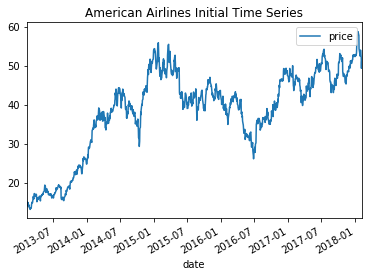

In [3]:
aal_df.index = pd.to_datetime(aal_df.date)
aal_df.plot()
plt.title('American Airlines Initial Time Series')
plt.legend(['price'])
plt.show()

Because there is an upward trend, I'll take the differences between subsequent prices and plot those to create stationary data.

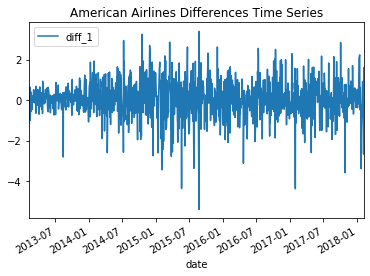

In [4]:
aal_df['diff_1'] = aal_df.open - aal_df.open.shift()
aal_df.plot(y='diff_1')
plt.title('American Airlines Differences Time Series')
plt.show()

Next I'll look at the PACF of the intital time series and the PACF of the differences to see if there is any
strong autocorrelation.

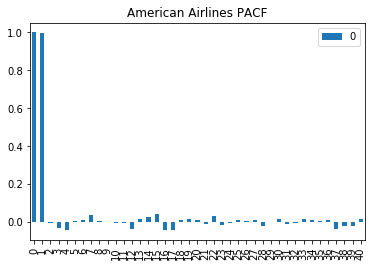

In [5]:
x_acf = pd.DataFrame(pacf(aal_df.open))
x_acf.plot(kind='bar')
plt.title("American Airlines PACF")
plt.show()

The initial time series has one strong autocorrelation.

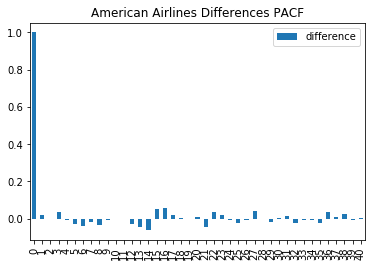

In [6]:
x_acf = pd.DataFrame(pacf(aal_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("American Airlines Differences PACF")
plt.legend(['difference'])
plt.show()

The differences don't have any strong autocorrleation. Next I'll use a variety of values for p,d,q in the ARIMA model to see which does the best job of predicting the stock price.

In [7]:
model = ARIMA(aal_df.open, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 1259
Model:                     ARMA(1, 0)   Log Likelihood               -1654.381
Method:                       css-mle   S.D. of innovations              0.898
Date:                Mon, 23 Mar 2020   AIC                           3314.763
Time:                        20:46:26   BIC                           3330.177
Sample:                             0   HQIC                          3320.555
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.1660      8.647      4.182      0.000      19.218      53.114
ar.L1.open     0.9977      0.002    534.764      0.000       0.994       1.001
                                    Roots           

In [8]:
model = ARIMA(aal_df.open, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -3996.110
Method:                       css-mle   S.D. of innovations              5.779
Date:                Mon, 23 Mar 2020   AIC                           7998.221
Time:                        20:46:27   BIC                           8013.635
Sample:                             0   HQIC                          8004.014
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3881      0.318    120.807      0.000      37.765      39.011
ma.L1.open     0.9519      0.007    141.029      0.000       0.939       0.965
                                    Roots           

In [9]:
model = ARIMA(aal_df.open, order=(0,1,0))
model_010_fit = model.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.open   No. Observations:                 1258
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1650.236
Method:                           css   S.D. of innovations              0.898
Date:                Mon, 23 Mar 2020   AIC                           3304.472
Time:                        20:46:27   BIC                           3314.746
Sample:                             1   HQIC                          3308.333
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.025      1.125      0.261      -0.021       0.078
Residuals Description
count    1.258000e+03
mean     6.636627e-17
std      8.987525e-01
min     -5.428490e+00
25%     -5.059897e-01

In [10]:
model = ARIMA(aal_df.open, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.open   No. Observations:                 1258
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1649.963
Method:                       css-mle   S.D. of innovations              0.898
Date:                Mon, 23 Mar 2020   AIC                           3305.925
Time:                        20:46:27   BIC                           3321.337
Sample:                             1   HQIC                          3311.717
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0285      0.026      1.103      0.270      -0.022       0.079
ma.L1.D.open     0.0209      0.028      0.739      0.460      -0.035       0.076
                                    Roots   

In [11]:
model = ARIMA(aal_df.open, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.open   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1649.589
Method:                       css-mle   S.D. of innovations              0.898
Date:                Mon, 23 Mar 2020   AIC                           3307.177
Time:                        20:46:27   BIC                           3327.726
Sample:                             1   HQIC                          3314.900
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0285      0.026      1.115      0.265      -0.022       0.079
ar.L1.D.open    -0.8254      0.241     -3.429      0.001      -1.297      -0.354
ma.L1.D.open     0.8436      0.229      3.68

In [12]:
model = ARIMA(aal_df.open, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.open   No. Observations:                 1258
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1649.575
Method:                       css-mle   S.D. of innovations              0.898
Date:                Mon, 23 Mar 2020   AIC                           3309.149
Time:                        20:46:28   BIC                           3334.836
Sample:                             1   HQIC                          3318.803
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0285      0.026      1.110      0.267      -0.022       0.079
ar.L1.D.open    -0.8398      0.228     -3.677      0.000      -1.288      -0.392
ar.L2.D.open     0.0053      0.032      0.16

In [13]:
model = ARIMA(aal_df.open, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D2.open   No. Observations:                 1257
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1651.739
Method:                       css-mle   S.D. of innovations              0.898
Date:                Mon, 23 Mar 2020   AIC                           3313.478
Time:                        20:46:30   BIC                           3339.160
Sample:                             2   HQIC                          3323.130
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.073e-05   6.99e-05     -0.582      0.560      -0.000    9.63e-05
ar.L1.D2.open    -0.9900      0.009   -114.929      0.000      -1.007      -0.973
ma.L1.D2.open    -0.0033      0.007     

In [14]:
model = ARIMA(aal_df.open, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D2.open   No. Observations:                 1257
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1652.489
Method:                       css-mle   S.D. of innovations              0.898
Date:                Mon, 23 Mar 2020   AIC                           3316.979
Time:                        20:46:31   BIC                           3347.798
Sample:                             2   HQIC                          3328.561
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.088e-05   7.22e-05     -0.566      0.571      -0.000       0.000
ar.L1.D2.open     0.4178        nan        nan        nan         nan         nan
ar.L2.D2.open    -0.0005      0.028     

None of these models is particularly great but the model with the lowest AIC is the (0,1,0) ARIMA. I believe it is  saying that the difference in the stock price from one day to the next will be a gain of about 2.5 cents per day. Next I take a look at the residuals of this model to see if there is any seasonality to them.

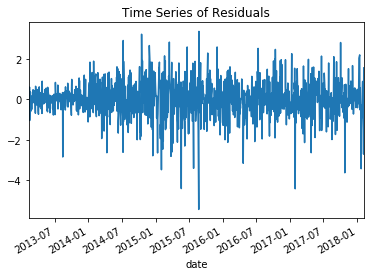

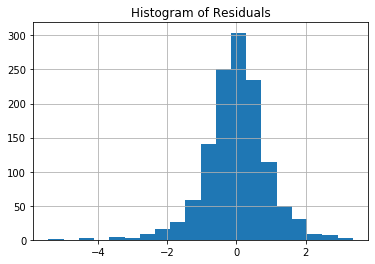

In [15]:
residuals = pd.DataFrame(model_010_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

plt.show()

There isn't a clear trend in the residuals and our residuals seem approximately standard normal but there is a pretty long tail on the lower end that could be indicating there are some outliers.